https://www.kaggle.com/code/dansbecker/random-forests

Decision trees with many leaf decisions will likely overfit.
A shallow tree may underfit.
A random fores uses many treets and predicts by averaging the predictions of each tree

In [4]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

''' 
Here we are replicating the code from the previous notebook that involved decision trees, 
to the point of loading the data, dropping missing values, defining the target variable and feature set.
'''
pd.options.display.float_format = '{:,.2f}'.format # rounding float values to 2 decimal places
file_path = "C:\\Users\\UserPC\\Desktop\\my_folder\\Learning alongside DProf\\kaggle and LinkedIn\\datasets\\melb_data.csv"
melb_data = pd.read_csv(file_path)
melb_data = melb_data.dropna(axis = 0)
melb_data.shape # 6195 rows and 21 columns remain after dropping rows with missing data.

y = melb_data.Price # defining the target variable
melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'BuildingArea', 
                        'YearBuilt', 'Lattitude', 'Longtitude'] 
X = melb_data[melbourne_features] # defining the feature set



In [5]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 1) # splitting the data into training and validation sets

forest_model = RandomForestRegressor(random_state = 1) # defining the random forest model
forest_model.fit(train_X, train_y) # fitting the model on the training data
forest_predictions = forest_model.predict(val_X) # making predictions on the validation data
forest_mae = mean_absolute_error(val_y, forest_predictions) # evaluating the model using MAE
print(f"Random Forest MAE: ${round(forest_mae, 2)}")


Random Forest MAE: $173864.26


On the Melbourne house data, the most accurate MAE on a single decision tree was $238,658, this at $173,864, this is already a huge improvement!

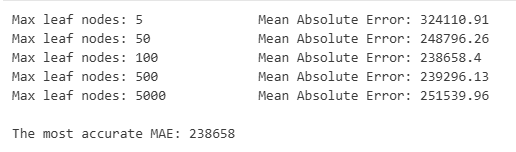

So let's replicate on the larger housing data which previously we got to $27,282

In [6]:
# loading fresh data for further model testing

house_data_path = "C:\\Users\\UserPC\\Desktop\\my_folder\\Learning alongside DProf\\kaggle and LinkedIn\\datasets\\train_data_housing.csv"
house_data = pd.read_csv(house_data_path)

y = house_data.SalePrice # defining our target variable

features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd'] # now defining our features
X = house_data[features]

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 1) # splitting the data into training and validation sets

house_model = RandomForestRegressor(random_state = 1) # specifying the random forest model
house_model.fit(train_X, train_y) # fitting the model on the training data
house_predictions = house_model.predict(val_X) # making predictions on the validation data
house_mae = mean_absolute_error(val_y, house_predictions) # evaluating the model using MAE
print(f"Baseline Random Forest (untuned) MAE: ${round(house_mae, 2)}")


Baseline Random Forest (untuned) MAE: $21857.16


This is a huge improvement on the decision tree model!